#**Plants Seedling Classification**


# Background and Context


> In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

> The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.






# Objective

> The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.



# Data description

This dataset contains images of unique plants belonging to 12 different species.

The data file names are:

    1. images.npy
    2. Label.csv

> Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

1. Black-grass
2. Charlock
3. Cleavers
4. Common Chickweed
5. Common Wheat
6. Fat Hen
7. Loose Silky-bent
8. Maize
9. Scentless Mayweed
10. Shepherds Purse
11. Small-flowered Cranesbill
12. Sugar beet

#  Import Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2 
import math 

## To ignore warnings 

import warnings
warnings.filterwarnings('ignore')

## TensorFlow Libiraries 

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam ,SGD

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Display Images using OpenCV

from google.colab.patches import cv2_imshow
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# Reading DataSet 

In [ ]:
# Mounting Google Drive 

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Load the images 

plantImages= np.load('/content/drive/MyDrive/Project 8-CNN-Plants Seedling Classification/images.npy')

In [ ]:
## Load Labels 

plantLabels=pd.read_csv('/content/drive/MyDrive/Project 8-CNN-Plants Seedling Classification/Labels.csv')

# Data Overview 

In [ ]:
plantImages.shape

(4750, 128, 128, 3)

In [ ]:
plantLabels.shape

(4750, 1)

In [ ]:
np.unique(plantLabels).shape

(12,)

There are total 4750 Images  of size 128 X 128 , each image is having 3 channels and there are total 12 different types of images which we need to classify .

# Plotting Image 

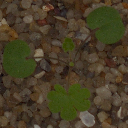

In [ ]:
cv2_imshow(plantImages[1])

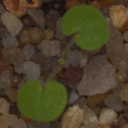

In [ ]:
cv2_imshow(plantImages[5])

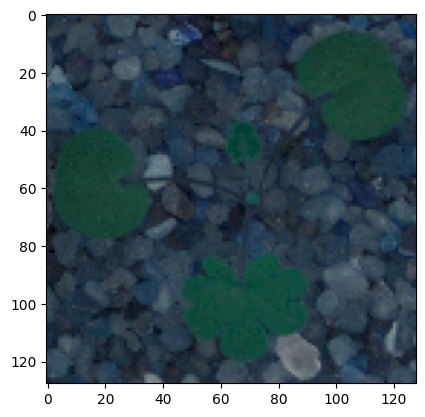

In [ ]:
plt.imshow(plantImages[1])

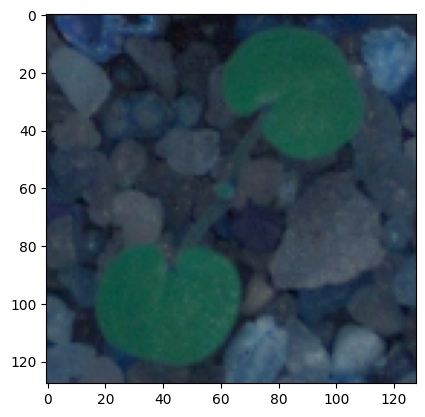

In [ ]:
plt.imshow(plantImages[5])

# Observation 
 1.  We can see that images shown using opencv and matplotlib are in different  colors.
 2. OpenCV reads images in BGR format ( Blue , Green, Red) and so we can say that  the numpy arrary provided as input is being generated from original images using OPENCV
 3. Next we will covert these BGR images to RGB format 

In [ ]:
for i in range(len(plantImages)):
  plantImages[i]=cv2.cvtColor(plantImages[i],cv2.COLOR_BGR2RGB)

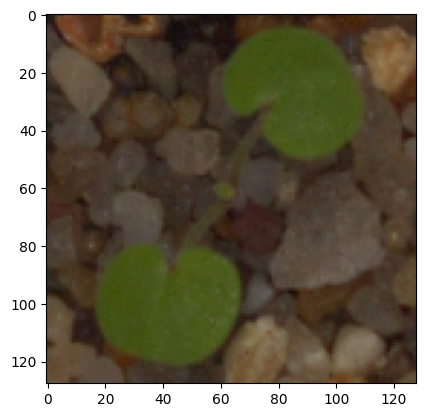

In [ ]:
plt.imshow(plantImages[5])

# Exploratory Data Analysis

In [ ]:
# Storing the value counts of target variable
count=plantLabels.Label.value_counts()
print(count)
print('*'*10)
count=plantLabels.Label.value_counts(normalize=True)
print(count)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64
**********
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64


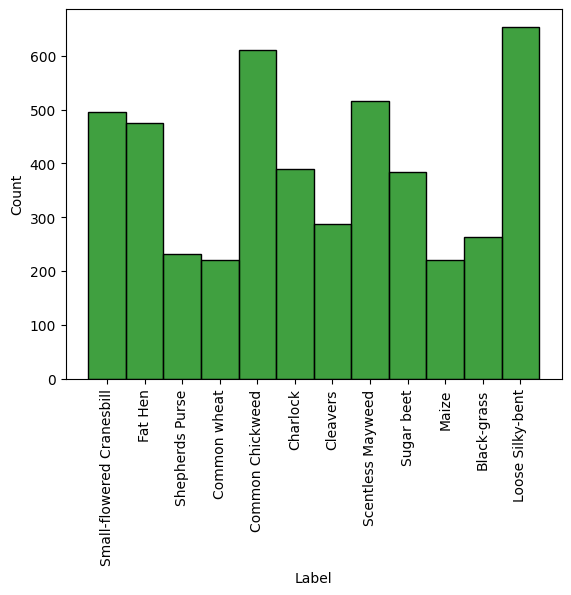

In [ ]:
sns.histplot(plantLabels['Label'],color="green")
plt.xticks(rotation='vertical')
plt.show()

We cab see that  data is imbalanced , maximum data points belong to Loose Silky-bent plant seed type whereas  shepherds Purse, common wheat and Maize have very fe data points . THis gives use indication that  to address this class imbalance issue we will have to use imgage Data generator to add additional  sample data . 

In [ ]:
## Function to  plot random images  from data set in figure of size 10,8 
##and  showing 3 rows and 4 columns . 

def plot_images(images,labels):

  keys=dict(labels['Label'])                                                     
  rows = 3                                                                       
  cols = 4                                                                       
  fig = plt.figure(figsize=(10, 8))                                               
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                       
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                     
        ##  ax.imshow(images[random_index, :])   
          ax.imshow(images[random_index])                                    
          ax.set_title(keys[random_index])
  plt.show()

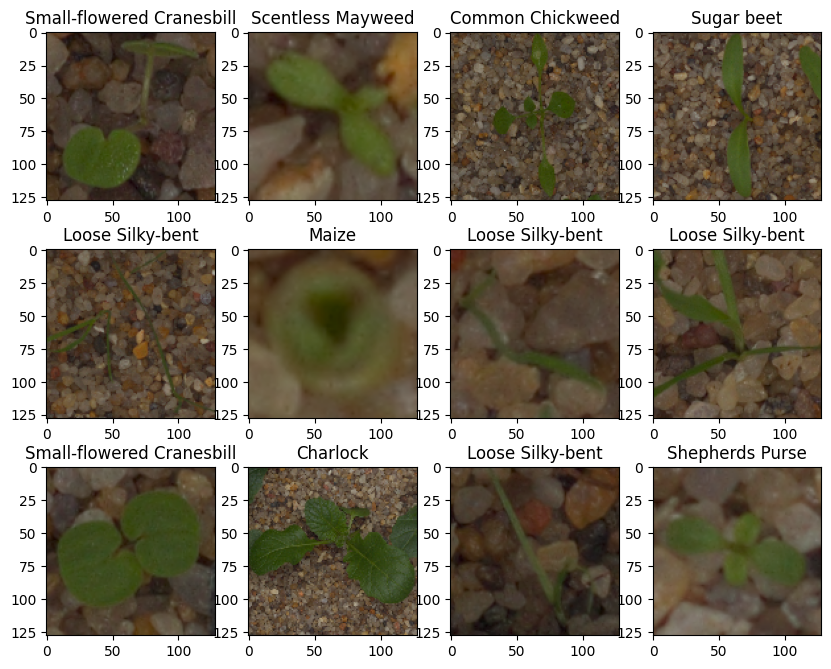

In [ ]:
plot_images(plantImages,plantLabels)

# Data Pre-Processing

## Resizing Images 
 Images are of size 128 X 128 so let us reduce it to 64 so that it can become computationally less expensive .

In [ ]:
reducedsize_plantImage=[]
height= 64
width=64 
dimensions=(width,height)
for i in range(len(plantImages)):
 reducedsize_plantImage.append(cv2.resize(plantImages[i],dimensions,interpolation=cv2.INTER_LINEAR))

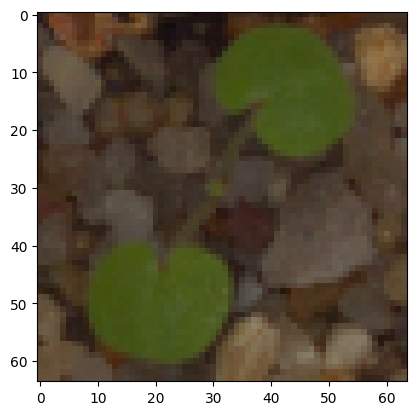

In [ ]:
plt.imshow(reducedsize_plantImage[5])

## Visualization Using Gaussian  Blur to remove noise from images 

In [ ]:
plantimages_postgb=[]
plantimagesreducedsize_postgb=[]
for i in range(len(plantImages)):
 plantimages_postgb.append(cv2.GaussianBlur(plantImages[i],ksize=(3,3),sigmaX=0))
 plantimagesreducedsize_postgb.append(cv2.GaussianBlur(reducedsize_plantImage[i],ksize=(3,3),sigmaX=0))

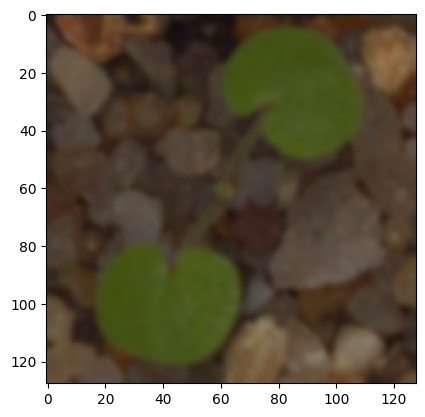

In [ ]:
plt.imshow(plantimages_postgb[5])

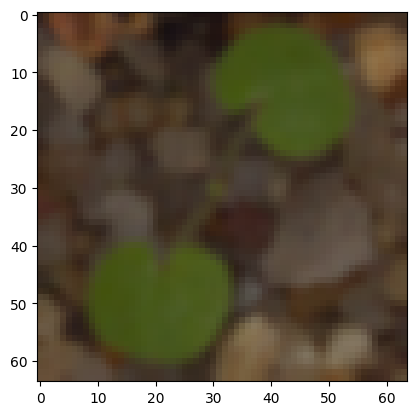

In [ ]:
plt.imshow(plantimagesreducedsize_postgb[5])

Observation 

1.   We tried to apply Gaussian Blue on actual image data and reduced size image data .  When we visualized images post Gaussian blur application we could see that  rduced size is much blue that the actual images . 
2. We will make a note of this , we will use reduced size data for model building and we will again come and see if we need to use  orginal size .


In [ ]:
np.array(reducedsize_plantImage).shape

(4750, 64, 64, 3)

 We have total 4750 data points so we will use 80% for training 10 % for validation and 10% for testing .

In [ ]:
X_temp,X_test,y_temp,y_test=train_test_split(np.array(reducedsize_plantImage),plantLabels,test_size=0.1,random_state=1,stratify=plantLabels)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.1,random_state=1,stratify=y_temp)

In [ ]:
print (X_train.shape,y_train.shape)

(3847, 64, 64, 3) (3847, 1)


In [ ]:
print (X_test.shape,y_test.shape)

(475, 64, 64, 3) (475, 1)


In [ ]:
print (X_val.shape,y_val.shape)

(428, 64, 64, 3) (428, 1)


In [ ]:
print (y_train.value_counts(normalize=True))

Label                    
Loose Silky-bent             0.137770
Common Chickweed             0.128672
Scentless Mayweed            0.108656
Small-flowered Cranesbill    0.104497
Fat Hen                      0.099818
Charlock                     0.082142
Sugar beet                   0.081102
Cleavers                     0.060307
Black-grass                  0.055368
Shepherds Purse              0.048609
Common wheat                 0.046530
Maize                        0.046530
dtype: float64


In [ ]:
print (y_val.value_counts(normalize=True))

Label                    
Loose Silky-bent             0.137850
Common Chickweed             0.128505
Scentless Mayweed            0.107477
Small-flowered Cranesbill    0.102804
Fat Hen                      0.100467
Charlock                     0.081776
Sugar beet                   0.081776
Cleavers                     0.060748
Black-grass                  0.056075
Shepherds Purse              0.049065
Common wheat                 0.046729
Maize                        0.046729
dtype: float64


In [ ]:
print (y_test.value_counts(normalize=True))

Label                    
Loose Silky-bent             0.136842
Common Chickweed             0.128421
Scentless Mayweed            0.109474
Small-flowered Cranesbill    0.105263
Fat Hen                      0.101053
Charlock                     0.082105
Sugar beet                   0.080000
Cleavers                     0.061053
Black-grass                  0.054737
Shepherds Purse              0.048421
Common wheat                 0.046316
Maize                        0.046316
dtype: float64


## Making Data Compitable

 1. Coverting labels from  names to one hot vector
 2. Normalizing values 

### Encoding Target Variable

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc= LabelBinarizer()

In [ ]:
y_train_encoded=enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normaization

 Image pixcel values range from 0-255 and we will stadnarize it by diving each values by 255 so that all values will range between 0 and 1.

In [ ]:
X_train_normalized= X_train.astype('float32')/255.0

In [ ]:
X_val_normalized=X_val.astype('float32')/255.0
X_test_normalized=X_test.astype('float32')/255.0

In [ ]:
X_train_normalized.shape

(3847, 64, 64, 3)

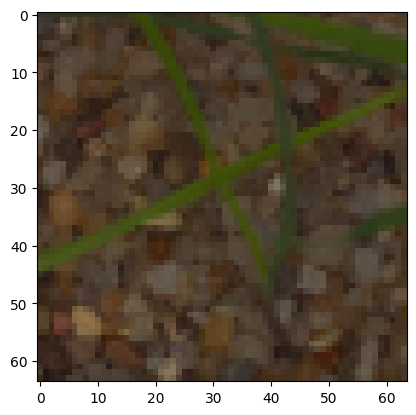

In [ ]:
plt.imshow(X_train_normalized[1])

# CNN ( Convolution Neural Network) Model Building

 Before starting any model we need to do two important things , clear all previous model's history and set seed so that we will always get same output .

## Clearing Backned  : To clear Previous Model's history from Session

In [ ]:
from tensorflow.keras import backend
backend.clear_session()

## Setting Seed for Random Number Generator 
Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
import random 
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

Let us Start building CNN model sequencially where we wil keep adding Layers sequencially  In each CNN Model we will have two parts ,


1.   Feature Extraction layer which will comprise of Convolution Layer  , Pooling , Padding Layer
2.   Fully Connected Classification Layer, In our data we have total 12 types of images which we need to classify .


# Model1

1. Filters: 64- Number of filters in the first hidden layer.This is also called as Kernel
2. Kernel_Size: The kernel size here refers to the widthxheight of the  3.  filter mask. The kernel_size must be an odd integer as well. Typical values for kernel_size include: (1, 1) , (3, 3) , (5, 5) , (7, 7)
4. Padding: The padding type is called SAME because the output size is the same as the input size(when stride=1). Using 'SAME' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model. Output size is mathematically convenient for further computation.
5. MaxPool2D: Max Pooling is a pooling operation that calculates the maximum value for patches of a feature map, and uses it to create a downsampled (pooled) feature map. It is usually used after a convolutional layer.
6. Flatten: Flattening is converting the data into a 1-dimensional array for giving them as input to the next layer. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

In [ ]:
from keras.engine.training import optimizer
from keras.api._v2.keras import activations
model= Sequential()

model.add(Conv2D (64,(3,3),activation='relu',padding='same',input_shape=(64,64,3)))

model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(12,activation='softmax'))

opt= Adam(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 100)               8

In [ ]:
## Fittting the Model on Train data 

history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 14s - loss: 2.3320 - accuracy: 0.1944 - val_loss: 2.0122 - val_accuracy: 0.3224 - 14s/epoch - 114ms/step
Epoch 2/30
121/121 - 1s - loss: 1.6270 - accuracy: 0.4242 - val_loss: 1.5436 - val_accuracy: 0.5047 - 773ms/epoch - 6ms/step
Epoch 3/30
121/121 - 1s - loss: 1.2744 - accuracy: 0.5701 - val_loss: 1.4183 - val_accuracy: 0.5257 - 792ms/epoch - 7ms/step
Epoch 4/30
121/121 - 1s - loss: 1.0878 - accuracy: 0.6298 - val_loss: 1.1333 - val_accuracy: 0.6379 - 961ms/epoch - 8ms/step
Epoch 5/30
121/121 - 1s - loss: 0.9167 - accuracy: 0.6907 - val_loss: 1.0716 - val_accuracy: 0.6706 - 957ms/epoch - 8ms/step
Epoch 6/30
121/121 - 1s - loss: 0.8076 - accuracy: 0.7304 - val_loss: 1.2478 - val_accuracy: 0.5888 - 1s/epoch - 9ms/step
Epoch 7/30
121/121 - 1s - loss: 0.7312 - accuracy: 0.7650 - val_loss: 1.0596 - val_accuracy: 0.6706 - 910ms/epoch - 8ms/step
Epoch 8/30
121/121 - 1s - loss: 0.6173 - accuracy: 0.7988 - val_loss: 1.0273 - val_accuracy: 0.6916 - 765ms/epoch - 6ms/step
Ep

## Model Evaluation

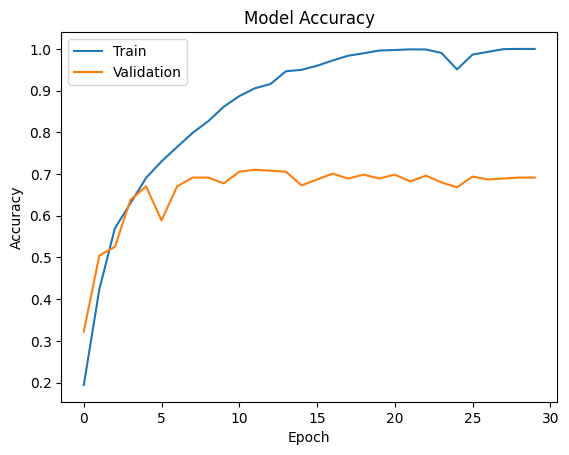

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Observation 
 1. We can see that there is hugh gap between Train and validation accuracy also we have see that  validation loss value is much higher ( 2.12 )
 2. This clearly indicates that Model is overfitting and in future modesl we will add layers and do  data augumentation to overcome this overfitting .


##Evaluating Model on Test Data 

In [ ]:
accuracy1=model.evaluate(X_test_normalized,y_test_encoded,verbose=2)

15/15 - 0s - loss: 2.2784 - accuracy: 0.6905 - 133ms/epoch - 9ms/step


In [ ]:
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 4ms/step


## Common Fucntion to Plot Confusion Matrix 



In [ ]:
 def plot_confusionMatrix(prediction,actual):
   y_pred_arg = np.argmax(prediction,axis=1)
   y_test_arg =np.argmax(actual,axis=1)

   confusionMatrix=tf.math.confusion_matrix(y_test_arg,y_pred_arg)
   f,ax=plt.subplots(figsize=(10,8))
   sns.heatmap(
       confusionMatrix,
       annot=True,
       linewidths=0.3,
       fmt="d",
       square=True,
       ax=ax
   )
   plt.show()

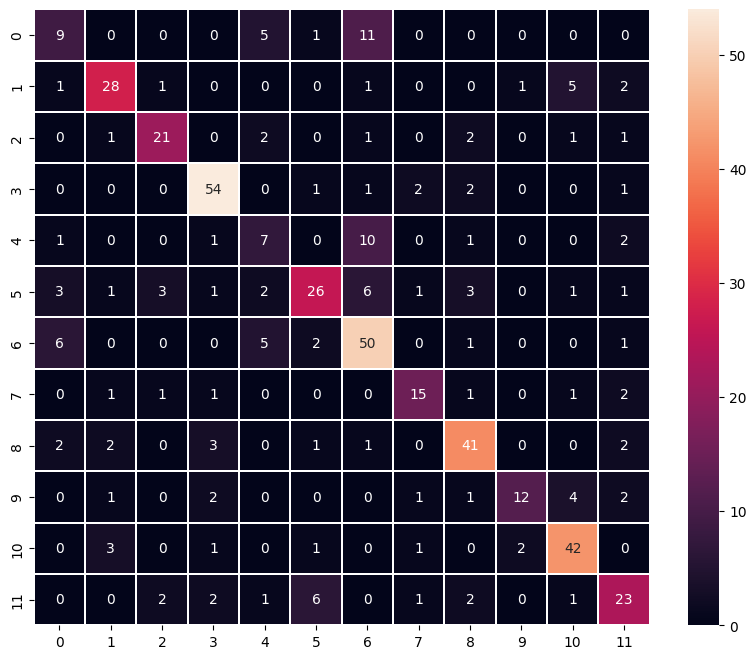

In [ ]:
plot_confusionMatrix(y_pred,y_test_encoded)

We can see  amost all classes are misclassfied but  class 0 ,4,5 6 ,7 have more imanges which are misclassied  .

We have seen the differnce in Loss value of Train and validation data which clearly denotes there is overfitting .

So in next model we will try to address overfitting issue .

# Model2  - Using Additional Conv Layers , Drop Out and Early Stopping

## **Early stopping** 
This technique is similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [ ]:
backend.clear_session()

In [ ]:
# initialized a sequential model
model_2 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_2.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))


# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size=(2,2)))

#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_2.add(Dropout(0.3))


# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model_2.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model_2.add(Dense(32, activation = "relu"))

# adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem with 3 classes.
model_2.add(Dense(12, activation = "softmax"))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 256)       19456     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [ ]:
optimizer = Adam(lr=0.001)
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_2=model_2.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
109/109 [==============================] - ETA: 0s - loss: 2.4545 - accuracy: 0.1222
Epoch 1: val_accuracy improved from -inf to 0.12987, saving model to best_model.h5
109/109 [==============================] - 10s 43ms/step - loss: 2.4545 - accuracy: 0.1222 - val_loss: 2.4293 - val_accuracy: 0.1299
Epoch 2/30
107/109 [============================>.] - ETA: 0s - loss: 2.4251 - accuracy: 0.1437
Epoch 2: val_accuracy improved from 0.12987 to 0.13247, saving model to best_model.h5
109/109 [==============================] - 4s 36ms/step - loss: 2.4258 - accuracy: 0.1430 - val_loss: 2.4218 - val_accuracy: 0.1325
Epoch 3/30
109/109 [==============================] - ETA: 0s - loss: 2.3096 - accuracy: 0.2293
Epoch 3: val_accuracy improved from 0.13247 to 0.33247, saving model to best_model.h5
109/109 [==============================] - 4s 37ms/step - loss: 2.3096 - accuracy: 0.2293 - val_loss: 2.0648 - val_accuracy: 0.3325
Epoch 4/30
107/109 [============================>.] - ETA: 0

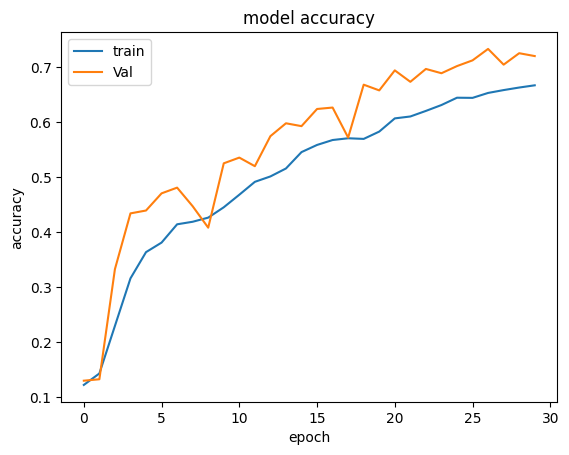

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

In [ ]:
eval_model_2= model_2.evaluate(X_test_normalized,y_test_encoded)

15/15 [==============================] - 1s 35ms/step - loss: 0.8899 - accuracy: 0.6884


In [ ]:
prediction_2=model_2.predict(X_test_normalized)

15/15 [==============================] - 0s 9ms/step


In [ ]:
plot_confusionMatrix(prediction_2,y_test_encoded)

NameError: ignored

## Observation 

1.  As compared to Model1  ,model2 has much better accurancy on validation data 
2.  We can see that there is less gap between validation and training accurancy , in fact we could see validation accurancy is slightly  more than training accurancy 
3. However; still Loss is high in both training and validation  so let us try using data augumentations in next model and see  if we can get any imrpvoements .




# Model 3-  Using Data Augumentation

## **Data Augmentation**

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

We will just use Data Augumentation in Train data .

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                              horizontal_flip = True,
                              vertical_flip = False, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1)
val_datagen  = ImageDataGenerator(rescale = 1.0/255.)
                                                                        

In [ ]:
model_3= Sequential()


# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model_3.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))


# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2)))

#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_3.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model_3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model_3.add(Dropout(0.3))


# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model_3.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
model_3.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model_3.add(Dense(32, activation = "relu"))

# adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem with 3 classes.
model_3.add(Dense(12, activation = "softmax")) 

NameError: ignored

In [ ]:
optimizer = Adam(lr=0.001)
model_3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [ ]:
from tensorflow._api.v2.random import shuffle
history_3 =model_3.fit(train_augumented.flow(X_train_normalized,y_train_encoded,batch_size=64,
                                             seed=42,shuffle=False),
                       epochs=30,
                       validation_data= (X_val_normalized,y_val_encoded),
                       verbose=1)


Epoch 1/30
61/61 [==============================] - 13s 116ms/step - loss: 2.4587 - accuracy: 0.1022 - val_loss: 2.4679 - val_accuracy: 0.1355
Epoch 2/30
61/61 [==============================] - 7s 118ms/step - loss: 2.4301 - accuracy: 0.1274 - val_loss: 2.4291 - val_accuracy: 0.1285
Epoch 3/30
61/61 [==============================] - 6s 97ms/step - loss: 2.4260 - accuracy: 0.1282 - val_loss: 2.4214 - val_accuracy: 0.1285
Epoch 4/30
61/61 [==============================] - 6s 98ms/step - loss: 2.4207 - accuracy: 0.1297 - val_loss: 2.4198 - val_accuracy: 0.1285
Epoch 5/30
61/61 [==============================] - 7s 117ms/step - loss: 2.4205 - accuracy: 0.1378 - val_loss: 2.4192 - val_accuracy: 0.1379
Epoch 6/30
61/61 [==============================] - 6s 97ms/step - loss: 2.4190 - accuracy: 0.1427 - val_loss: 2.4208 - val_accuracy: 0.1379
Epoch 7/30
61/61 [==============================] - 7s 117ms/step - loss: 2.4200 - accuracy: 0.1336 - val_loss: 2.4189 - val_accuracy: 0.1379
Epoch 8/

In [ ]:
eval_3 = model_3.evaluate(X_test_normalized,y_test_encoded)

NameError: ignored

In [ ]:
predict_3 =model_3.predict(X_test_normalized)

In [ ]:
plot_confusionMatrix(predict_3,y_test_encoded)

# Transfer Learning using VGG16

Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [ ]:
backend.clear_session()

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

In [ ]:
# Epochs
'''
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_augumented.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=1,
                                       shuffle=False),
                    epochs=epochs,
                  #  steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)'''


optimizer = Adam(lr=0.001)
model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_vgg16=new_model.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc],use_multiprocessing=True)

In [ ]:
pred-vgg16= new_model.predict()